In [15]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import os
os.chdir('/content/drive/MyDrive')


In [17]:
#!pip install -q kaggle

In [18]:
#!mkdir -p ~/.kaggle

In [19]:
#!cp kaggle.json ~/.kaggle/

In [20]:
#!chmod 600 ~/.kaggle/kaggle.json

In [21]:
#!kaggle datasets download -d sadhliroomyprime/motorcycle-night-ride-semantic-segmentation


In [22]:
#!unzip motorcycle-night-ride-semantic-segmentation.zip


In [23]:
#!pip install graphviz
#!pip install pydot

In [24]:
import tensorflow.keras.layers as layers
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

In [25]:
import os

image_dir = "/content/drive/MyDrive/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images"

input_img_paths = sorted([os.path.join(image_dir, fname)
                          for fname in os.listdir(image_dir)
                          if not (('fuse' in fname) or ('save' in fname))])
target_img_paths = sorted([os.path.join(image_dir, fname)
                           for fname in os.listdir(image_dir)
                           if 'fuse' in fname])


print(target_img_paths)
len(target_img_paths)

['/content/drive/MyDrive/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/Screenshot (309).png___fuse.png', '/content/drive/MyDrive/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/Screenshot (310).png___fuse.png', '/content/drive/MyDrive/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/Screenshot (311).png___fuse.png', '/content/drive/MyDrive/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/Screenshot (312).png___fuse.png', '/content/drive/MyDrive/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/Screenshot (313).png___fuse.png', '/content/drive/MyDrive/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/Screenshot (314).png___fuse.png', '/content/drive/MyDrive/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/Screenshot (317).png___fuse.png', '/content/drive/MyDrive/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/Screenshot (318).png___fuse.png', '/conte

200

Number of input images: 200
Number of target images: 200


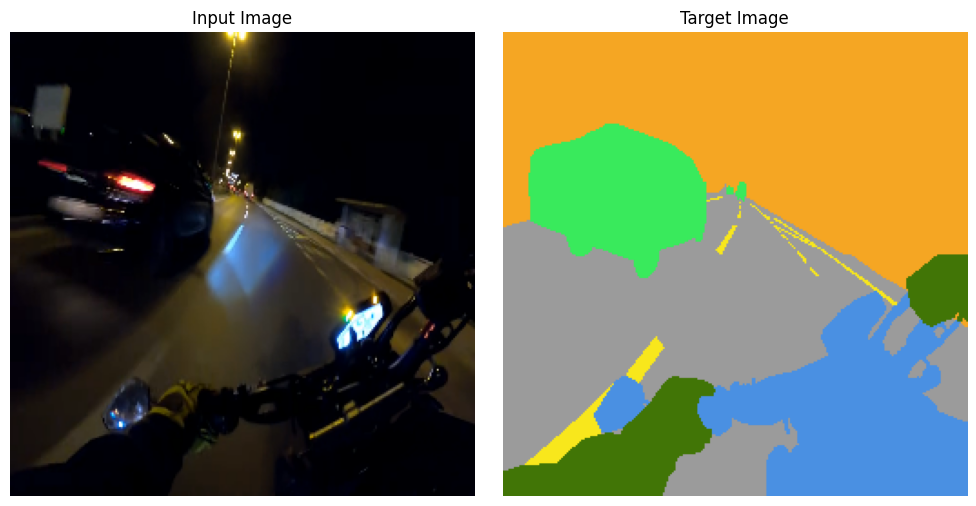

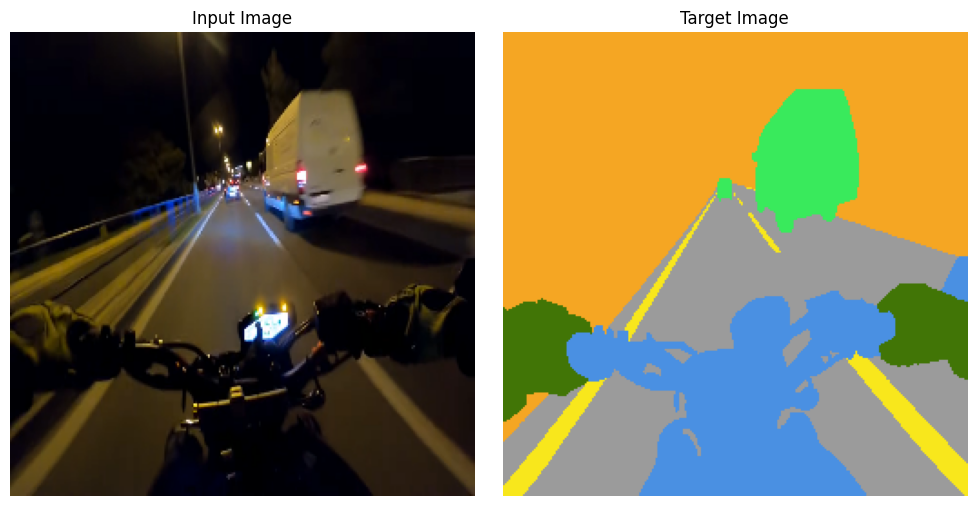

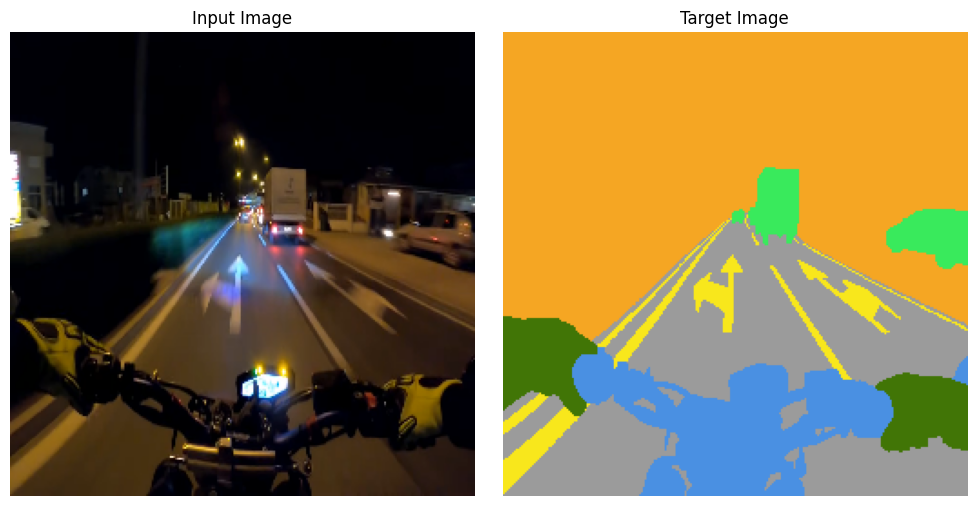

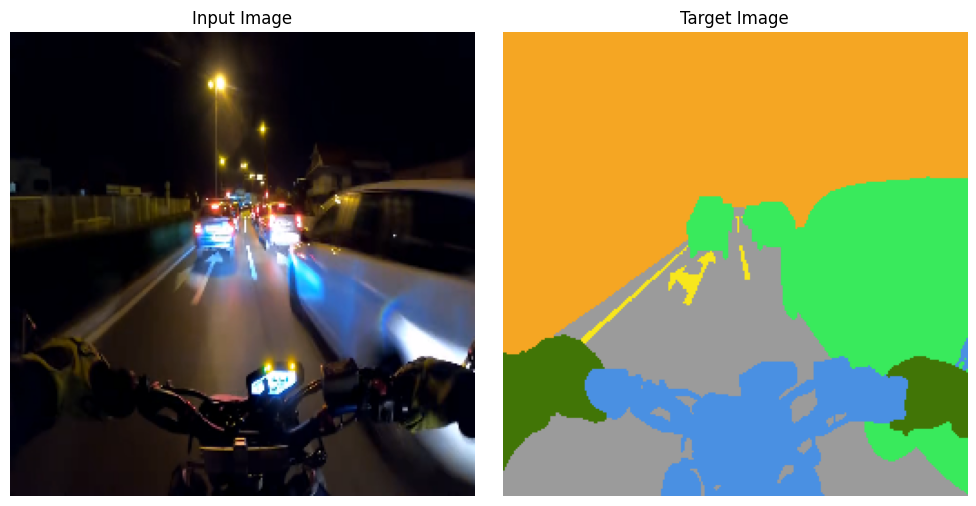

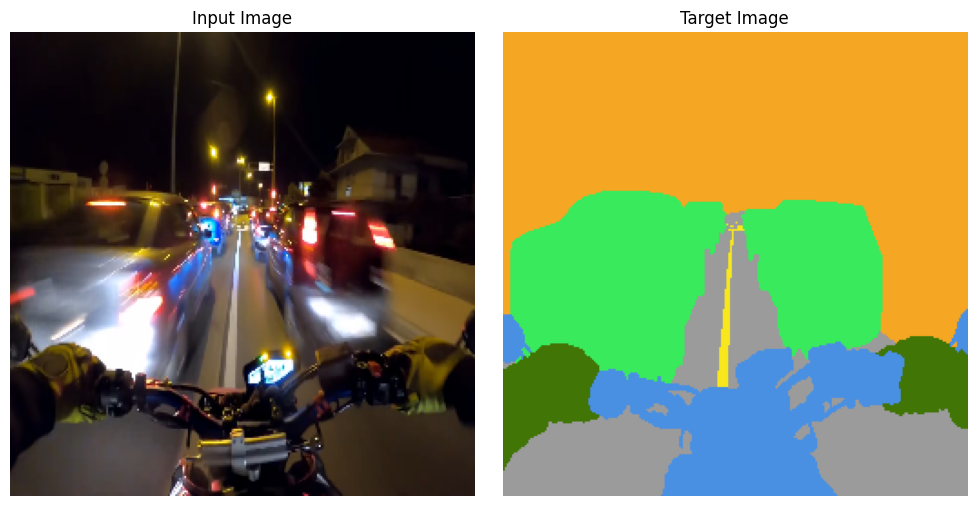

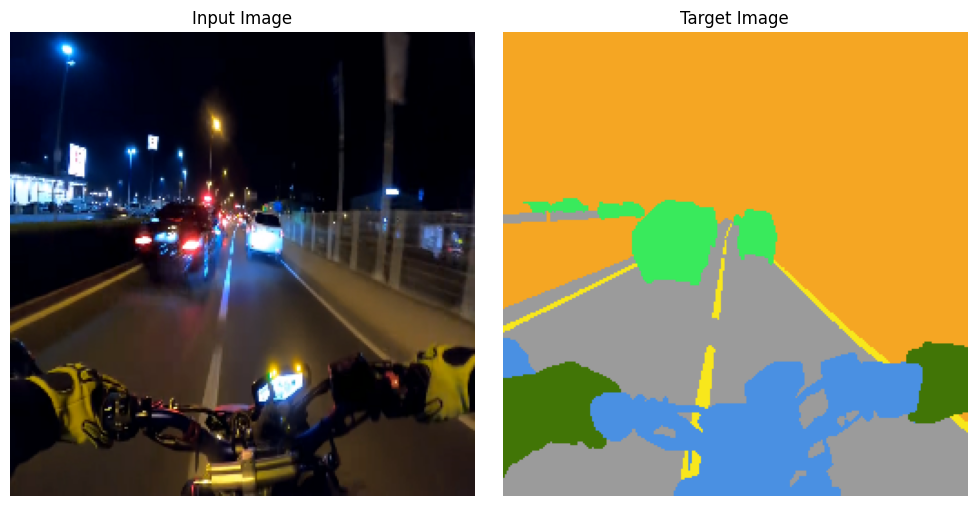

In [26]:
#이미지를 로드하고 시각화하는 함수
def visualize_images(input_img_paths, target_img_paths):
    num_images = min(len(input_img_paths), 6)  # 최대 6개의 이미지만 출력하도록 수정

    #이미지를 로드하고 시각화
    for i in range(num_images):
        #입력 이미지 로드 및 시각화
        input_img = load_img(input_img_paths[i], target_size=(256, 256))
        input_array = img_to_array(input_img)
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title('Input Image')
        plt.imshow(input_array.astype('uint8'))
        plt.axis('off')

        #대상 이미지 로드 및 시각화
        target_img = load_img(target_img_paths[i], target_size=(256, 256))
        target_array = img_to_array(target_img)
        plt.subplot(1, 2, 2)
        plt.title('Target Image')
        plt.imshow(target_array.astype('uint8'))
        plt.axis('off')

        plt.tight_layout()
        plt.show()

#이미지 경로의 길이 출력
print("Number of input images:", len(input_img_paths))
print("Number of target images:", len(target_img_paths))

#이미지 시각화 함수 호출
visualize_images(input_img_paths, target_img_paths)


In [27]:
len(input_img_paths)


200

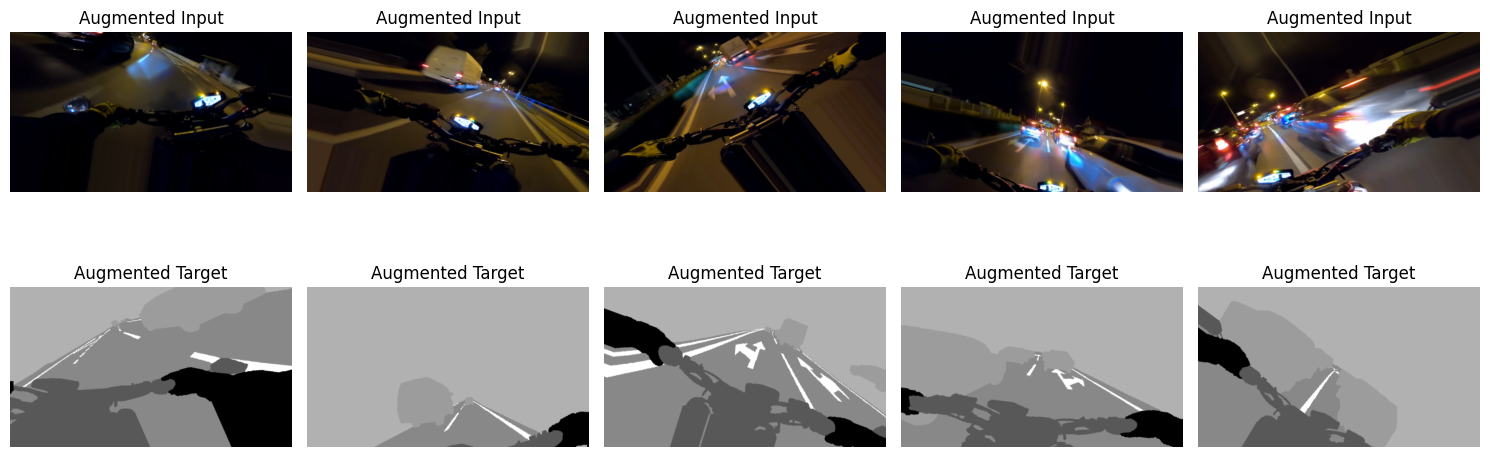

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

#데이터 증강을 위한 설정
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

#데이터 증강을 적용하여 이미지 로드 및 변환
num_images = len(target_img_paths)
augmented_input_imgs = []
augmented_target_imgs = []

for i in range(num_images):
    #입력 이미지 로드 및 증강
    input_img = load_img(input_img_paths[i], target_size=(272, 480))
    input_img = img_to_array(input_img)
    input_img = input_img.reshape((1,) + input_img.shape)

    target_img = load_img(target_img_paths[i], target_size=(272, 480), color_mode='grayscale')
    target_img = img_to_array(target_img)
    target_img = target_img.reshape((1,) + target_img.shape)

    #데이터 증강 적용
    for batch in datagen.flow(input_img, batch_size=1):
        augmented_input_imgs.append(batch[0])
        break

    for batch in datagen.flow(target_img, batch_size=1):
        augmented_target_imgs.append(batch[0])
        break

#리스트를 numpy 배열로 변환
augmented_input_imgs = np.array(augmented_input_imgs)
augmented_target_imgs = np.array(augmented_target_imgs)

#결과 확인을 위해 몇 개의 증강된 이미지를 시각화
n_images_to_show = 5
plt.figure(figsize=(15, 6))
for i in range(n_images_to_show):
    plt.subplot(2, n_images_to_show, i + 1)
    plt.imshow(augmented_input_imgs[i].astype(np.uint8))
    plt.title('Augmented Input')
    plt.axis('off')

    plt.subplot(2, n_images_to_show, i + n_images_to_show + 1)
    plt.imshow(augmented_target_imgs[i].squeeze().astype(np.uint8), cmap='gray')
    plt.title('Augmented Target')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [30]:
#이미지 크기 확인
img = load_img(input_img_paths[0])
img.size

(1920, 1080)

In [34]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

#타겟 이미지를 그레이스케일로 로드하고 배열로 변환
def path_to_target(path):
    target_image = load_img(path, color_mode='grayscale')
    target_array = img_to_array(target_image)
    target_array = target_array.astype("uint8")

#입력 이미지를 배열로 변환
def path_to_input_image(path):
    return img_to_array(load_img(path))

    #배열 내의 유니크한 색상값 확인
    unique_colors = np.unique(target_array)

    #색상값을 레이블에 매핑하기 위한 딕셔너리 생성
    color_to_label = dict()
    label_to_color = dict()

    for i in range(len(unique_colors)):
        label = np.uint8(i)
        color_value = unique_colors[i]
        color_to_label[color_value] = label
        label_to_color[label] = color_value

    #타겟 배열의 각 값을 레이블로 매핑
    mapped_labels = np.zeros_like(target_array, dtype=np.uint8)

    for r in range(target_array.shape[0]):
        for c in range(target_array.shape[1]):
            pixel_value = target_array[r, c][0]  #그레이스케일 이미지이므로 [0]을 사용하여 값을 가져옴.
            mapped_labels[r, c] = color_to_label[pixel_value]

    return mapped_labels


In [35]:
# 리스트 초기화
loaded_input_imgs = []
loaded_targets = []

for i in range(len(input_img_paths)):
    loaded_input_imgs.append(path_to_input_image(input_img_paths[i]))
    loaded_targets.append(path_to_target(target_img_paths[i]))

# 리스트를 numpy 배열로 변환
loaded_input_imgs = np.array(loaded_input_imgs)
loaded_targets = np.array(loaded_targets)

# 데이터 형태 확인
print("Loaded Input Images Shape:", loaded_input_imgs.shape)
print("Loaded Targets Shape:", loaded_targets.shape)

Loaded Input Images Shape: (200, 1080, 1920, 3)
Loaded Targets Shape: (200,)


In [38]:
#이미지를 numpy 배열로 변환하는 함수
def load_and_preprocess_image(img_path, target_size=(572, 572)):
    img = load_img(img_path, target_size=target_size, color_mode="grayscale")  # grayscale로 변경
    img = img_to_array(img) / 255.0  # 이미지를 [0, 1] 범위로 정규화
    return img

#학습, 검증, 테스트 데이터 분할
num_test_samples = 20
num_val_samples = 20

#학습 데이터
train_input_imgs = [load_and_preprocess_image(path) for path in input_img_paths[:-num_val_samples - num_test_samples]]
train_targets = [load_and_preprocess_image(path) for path in target_img_paths[:-num_val_samples - num_test_samples]]

#검증 데이터
val_input_imgs = [load_and_preprocess_image(path) for path in input_img_paths[-(num_val_samples + num_test_samples):-num_test_samples]]
val_targets = [load_and_preprocess_image(path) for path in target_img_paths[-(num_val_samples + num_test_samples):-num_test_samples]]

#테스트 데이터
test_input_imgs = [load_and_preprocess_image(path) for path in input_img_paths[-num_test_samples:]]
test_targets = [load_and_preprocess_image(path) for path in target_img_paths[-num_test_samples:]]

#리스트를 numpy 배열로 변환
train_input_imgs = np.array(train_input_imgs)
train_targets = np.array(train_targets)
val_input_imgs = np.array(val_input_imgs)
val_targets = np.array(val_targets)
test_input_imgs = np.array(test_input_imgs)
test_targets = np.array(test_targets)

#데이터 형태 확인 (예: 학습 데이터)
print("Train Input Images Shape:", train_input_imgs.shape)
print("Train Targets Shape:", train_targets.shape)


Train Input Images Shape: (160, 572, 572, 1)
Train Targets Shape: (160, 572, 572, 1)


In [39]:

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Rescaling, Conv2D, MaxPooling2D, UpSampling2D, concatenate

inputs = layers.Input(shape=(572, 572, 1))

# Contracting path 시작
conv0 = layers.Conv2D(64, activation='relu', kernel_size=3)(inputs)
conv1 = layers.Conv2D(64, activation='relu', kernel_size=3)(conv0)
conv2 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv1)

conv3 = layers.Conv2D(128, activation='relu', kernel_size=3)(conv2)
conv4 = layers.Conv2D(128, activation='relu', kernel_size=3)(conv3)
conv5 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv4)

# [3]번 블럭
conv6 = layers.Conv2D(256, activation='relu', kernel_size=3)(conv5)
conv7 = layers.Conv2D(256, activation='relu', kernel_size=3)(conv6)
conv8 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv7)

# [4]번 블럭
conv9 = layers.Conv2D(512, activation='relu', kernel_size=3)(conv8)
conv10 = layers.Conv2D(512, activation='relu', kernel_size=3)(conv9)
conv11 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv10)

conv12 = layers.Conv2D(1024, activation='relu', kernel_size=3)(conv11)
conv13 = layers.Conv2D(1024, activation='relu', kernel_size=3)(conv12)

# Expanding path 시작
trans01 = layers.Conv2DTranspose(512, kernel_size=2, strides=(2, 2), activation='relu')(conv13)
crop01 = layers.Cropping2D(cropping=(4, 4))(conv10)
concat01 = layers.concatenate([trans01, crop01], axis=-1)

conv14 = layers.Conv2D(512, activation='relu', kernel_size=3)(concat01)
conv15 = layers.Conv2D(512, activation='relu', kernel_size=3)(conv14)
trans02 = layers.Conv2DTranspose(256, kernel_size=2, strides=(2, 2), activation='relu')(conv15)

crop02 = layers.Cropping2D(cropping=(16, 16))(conv7)
concat02 = layers.concatenate([trans02, crop02], axis=-1)

# [9]번 블럭
conv16 = layers.Conv2D(256, activation='relu', kernel_size=3)(concat02)
conv17 = layers.Conv2D(256, activation='relu', kernel_size=3)(conv16)
trans03 = layers.Conv2DTranspose(128, kernel_size=2, strides=(2, 2), activation='relu')(conv17)

crop03 = layers.Cropping2D(cropping=(40, 40))(conv4)
concat03 = layers.concatenate([trans03, crop03], axis=-1)

# [10]번 블럭
conv18 = layers.Conv2D(128, activation='relu', kernel_size=3)(concat03)
conv19 = layers.Conv2D(128, activation='relu', kernel_size=3)(conv18)
trans04 = layers.Conv2DTranspose(64, kernel_size=2, strides=(2, 2), activation='relu')(conv19)

crop04 = layers.Cropping2D(cropping=(88, 88))(conv1)
concat04 = layers.concatenate([trans04, crop04], axis=-1)

# [11]번 블럭
conv20 = layers.Conv2D(64, activation='relu', kernel_size=3)(concat04)
conv21 = layers.Conv2D(64, activation='relu', kernel_size=3)(conv20)

# [12]번 블럭
outputs = layers.Conv2D(2, kernel_size=1)(conv21)

#모델 구성
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="u-netmodel")


In [41]:
model.summary()

Model: "u-netmodel"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 572, 572, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 570, 570, 64)         640       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 568, 568, 64)         36928     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 284, 284, 64)         0         ['conv2d_1[0][0]']            
 D)                                                                                      

In [42]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
#컴파일
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
callbacks = [TensorBoard(log_dir='./log'), ModelCheckpoint("segmentation.h5", save_best_only=True)]
history = model.fit(train_input_imgs, train_targets,
                    epochs=100,
                    callbacks=callbacks,
                    batch_size=16,
                    validation_data=(val_input_imgs, val_targets))

Epoch 1/100


ValueError: ignored